**VADER** (Valence Aware Dictionary and sEntiment Reasoner) Sentiment Analysis is a text sentiment analysis tool designed to determine the sentiment expressed in short pieces of text. It uses a lexicon-based approach combined with rules to analyze the intensity of sentiments. VADER is particularly effective in social media contexts because it can handle both positive and negative sentiment, as well as the intensity of the sentiment, with considerations for punctuation, capitalization, degree modifiers, and negation. It provides scores for positive, negative, neutral, and compound sentiment, making it a useful tool for quickly assessing the sentiment of text data.









**About Dataset :** This Genshin Impact dataset, comprising only review and rating columns which is suitable for studying player feedback.

In [1]:
#importing essential packages
import pandas as pd
import numpy as np
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer #vaderSentiment==3.3.2
import matplotlib.pyplot as plt

In [2]:
#Importing csv file
Data=pd.read_csv('Google Play Reviews.csv')
Data.head()

,review,rating
0,Absolute Masterpiece i hate the people who gav...,5
1,amazing but the fandom isn't amazing,5
2,Very nice,5
3,Give me gambling money (primo gems),4
4,"This is one my first Open World RPG games, and...",4


In [3]:
#This user defined function will take text as input and gives sentiment as output using vader
def Sentiment_score(text):
    analyzer = SentimentIntensityAnalyzer()
    sentiment_score=analyzer.polarity_scores(text)
    if sentiment_score['neg']>sentiment_score['neu'] and sentiment_score['neg']> sentiment_score['pos']:
        sentiment='Negitive'
    elif sentiment_score['pos']>sentiment_score['neu'] and sentiment_score['neg']< sentiment_score['pos']:
        sentiment='Positive'
    else:
        sentiment='Nutral'
    return sentiment

In [4]:
#Creating column Sentiment of reviews using Sentiment_score user defined function
Data['Sentiment']=Data['review'].apply(Sentiment_score)
Data.head()

,review,rating,Sentiment
0,Absolute Masterpiece i hate the people who gav...,5,Nutral
1,amazing but the fandom isn't amazing,5,Negitive
2,Very nice,5,Positive
3,Give me gambling money (primo gems),4,Nutral
4,"This is one my first Open World RPG games, and...",4,Nutral


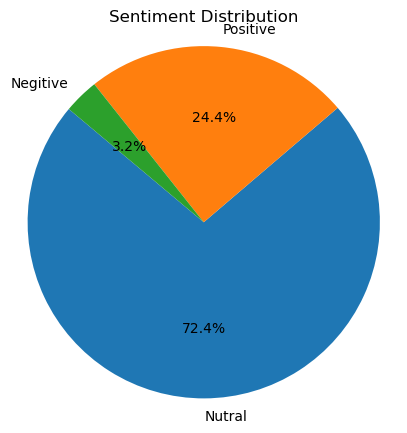

In [7]:
# Count the occurrences of each sentiment
sentiment_counts = Data['Sentiment'].value_counts()
# Plotting the pie chart
plt.figure(figsize=(5, 5))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.show()